In [ ]:
【例8.1】下面利用逻辑斯蒂回归模型对sklearn自带的手写数字数据集进行分类。

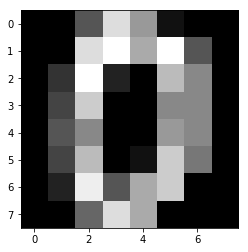

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression   # 用于分类，不能用于回归
from sklearn.datasets import load_digits
digits=load_digits()
data=digits['data']
target=digits['target']
images=digits['images']
plt.imshow(images[0],cmap='gray')

In [2]:
data.shape

(1797, 64)

In [3]:
logistic= LogisticRegression()
logistic.fit(data,target).score(data,target)   

0.993322203672788

In [ ]:
【例8.2】逻辑回归预测肿瘤。
数据描述如下：
（1）698 条样本，共 11 列数据，第1列用于检索的id，后 9 列分别是与肿瘤相关的医学特征，最后1列表示肿瘤类型的数值。
（2）包含 16 个缺失值，用”?”标出。

In [4]:
import  pandas as pd
import  numpy as np
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import  StandardScaler

In [5]:
# 逻辑回归
from  sklearn.linear_model import  LogisticRegression
# 模型评估
from  sklearn.metrics import  classification_report
#  AUC 指标计算
from  sklearn.metrics import roc_auc_score

In [10]:
# 加载数据
data = pd.read_csv("./breast-cancer-wisconsin.data")
print("data 的类型：",data.dtypes)

data 的类型： 1000025     int64
5           int64
1           int64
1.1         int64
1.2         int64
2           int64
1.3        object
3           int64
1.4         int64
1.5         int64
2.1         int64
dtype: object


In [11]:
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [12]:
# 设置列名称
columns = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
# 更改列名称
data.columns = columns
# 将？转化为np.nan
data.replace("?",np.nan,inplace=True)
# 可以使用dropna进行删除缺失值
data.dropna(how='any',axis= 0 ,inplace=True)
print("去除缺失值之后的形状：",data.shape)

去除缺失值之后的形状： (682, 11)


In [13]:
data['Bare Nuclei']=data['Bare Nuclei'].astype(int)  # object类型转化为int
print("data 的类型：",data.dtypes)

data 的类型： Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [14]:
# 选取特征值，目标值
x = data.iloc[:,1:10].values
y = data.iloc[:,-1].values
# 进行数据集拆分、返回特征值、返回目标值
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# 数据的标准化处理
st = StandardScaler()
# 进行标准化数据
st.fit_transform(x_train.astype(float))
st.fit_transform(x_test.astype(float))

array([[-1.14581768, -0.35529484, -0.7259183 , ..., -0.57829439,
        -0.62022932, -0.36049381],
       [ 0.19069796, -0.69885825, -0.7259183 , ..., -0.99426054,
        -0.62022932, -0.36049381],
       [-0.81168877, -0.69885825, -0.38847329, ..., -0.16232825,
        -0.62022932, -0.36049381],
       ...,
       [ 1.86134252,  0.33183198,  0.96130678, ...,  1.50153632,
        -0.62022932, -0.36049381],
       [-1.14581768, -0.69885825, -0.7259183 , ..., -0.99426054,
        -0.62022932, -0.36049381],
       [ 0.52482687, -0.69885825, -0.7259183 , ..., -0.16232825,
        -0.62022932, -0.36049381]])

In [15]:
# 进行逻辑回归预测
lg = LogisticRegression()
# 训练数据
lg.fit(x_train,y_train)
# 预测数据
y_predict = lg.predict(x_test)
print("y_predict:",y_predict)
print("权重：",lg.coef_)
print("截距：",lg.intercept_)
# 预测的准确率对比y_predict ,y_test
print("预测的准确率：",lg.score(x_test,y_test))  # 准确率为95以上，准确率很好

y_predict: [2 2 2 4 4 4 4 2 4 4 4 4 2 4 4 4 2 4 4 2 2 4 4 4 4 2 2 2 2 2 2 2 4 2 2 4 2
 2 2 4 2 2 2 4 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4 4
 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 4 4 4 2 2 2 4 2 4 2 2 4 4 4
 2 2 4 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2
 2 2 2 4 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 2 4 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 4
 2 4 2 4 2 2 4 4 4 2 2 4 2 2 4 4 4 4 2 2]
权重： [[ 0.18406412  0.15408253  0.2508888   0.26008184 -0.13547075  0.38059027
   0.16782606  0.31437716  0.04528516]]
截距： [-5.75830161]
预测的准确率： 0.9512195121951219


In [16]:
# 进行分类评估
report = classification_report(y_test,y_predict,labels=[2,4],target_names=['良性','恶性'])
print("分类评估报告如下所示：")
print(report)

分类评估报告如下所示：
             precision    recall  f1-score   support

         良性       0.97      0.96      0.96       134
         恶性       0.92      0.94      0.93        71

avg / total       0.95      0.95      0.95       205

